In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from keras.applications import MobileNetV2
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras.optimizers import Adam

In [19]:
conv_base = MobileNetV2(
    weights='imagenet',
    include_top = False,
    input_shape=(224,224,3)
)

In [20]:
for layer in conv_base.layers:
    layer.trainable = True

In [21]:
conv_base.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

In [22]:
model = Sequential([
    conv_base,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    # Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    # Dropout(0.5),
    # Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    # Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [23]:
conv_base.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

In [24]:

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_2 (Dense)             (None, 256)               327936    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 2586177 (9.87 MB)
Trainable params: 2552

In [25]:
train_datagen = ImageDataGenerator(
rescale=1./255,
    rotation_range=60,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/FYP/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/FYP/valid',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 2543 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [26]:
model.compile(
    optimizer=Adam(lr=1e-4),  # Reduced learning rate for fine-tuning
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [27]:
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)


In [28]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32,
    callbacks=[reduce_lr]
)

Epoch 1/50
79/79 [==============================] - 161s 2s/step - loss: 0.9902 - accuracy: 0.6822 - val_loss: 8.1801 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/50
79/79 [==============================] - 56s 711ms/step - loss: 0.7945 - accuracy: 0.7567 - val_loss: 4.0540 - val_accuracy: 0.5104 - lr: 0.0010
Epoch 3/50
79/79 [==============================] - 48s 606ms/step - loss: 0.7145 - accuracy: 0.7583 - val_loss: 3.6552 - val_accuracy: 0.4948 - lr: 0.0010
Epoch 4/50
79/79 [==============================] - 47s 597ms/step - loss: 0.6446 - accuracy: 0.7893 - val_loss: 6.0018 - val_accuracy: 0.5104 - lr: 0.0010
Epoch 5/50
79/79 [==============================] - 47s 601ms/step - loss: 0.6112 - accuracy: 0.7869 - val_loss: 5.7053 - val_accuracy: 0.4948 - lr: 0.0010
Epoch 6/50
79/79 [==============================] - 48s 604ms/step - loss: 0.5546 - accuracy: 0.7877 - val_loss: 5.9623 - val_accuracy: 0.5104 - lr: 0.0010
Epoch 7/50
79/79 [==============================] - 47s 594ms/step

In [29]:
train_acc = model.evaluate(train_generator)[1]
val_acc = model.evaluate(validation_generator)[1]
print("Training Accuracy:", train_acc)
print("Validation Accuracy:", val_acc)

7/7 [==============================] - 2s 281ms/step - loss: 0.4360 - accuracy: 0.8050
Training Accuracy: 0.9095556139945984
Validation Accuracy: 0.8050000071525574


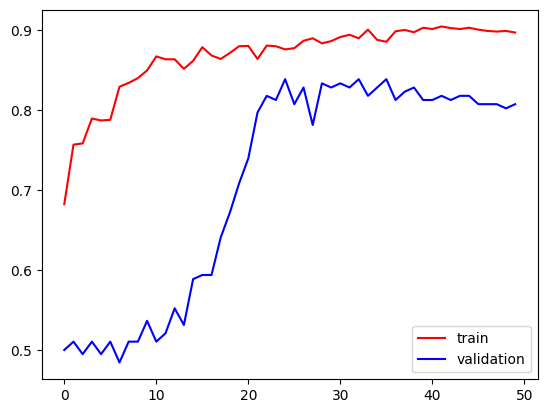

In [30]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

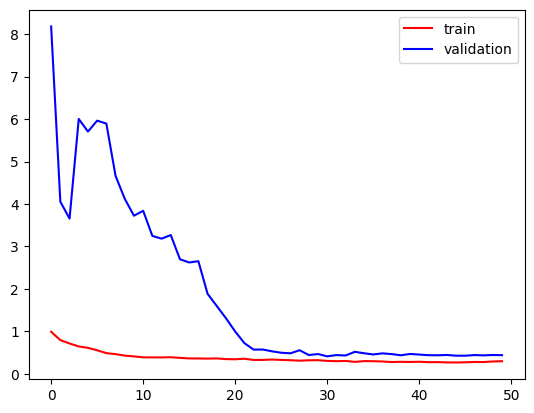

In [31]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [42]:
# Save the model to a file
model.save("/content/drive/MyDrive/FYP/second_mobile_netV2.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [59]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import os

# Load the trained model
model = load_model('/content/drive/MyDrive/FYP/second_mobile_netV2.h5')  # Replace with the path to your saved model file

# Directory containing images
base_dir = '/content/drive/MyDrive/FYP/test/'

# List of directories containing images
sub_dirs = ['autistic', 'non_autistic']

# Initialize lists to store true labels, predicted labels, and image filenames
predictions_info = []

# Loop through each directory
for sub_dir in sub_dirs:
    # Directory containing images
    dir_path = os.path.join(base_dir, sub_dir)

    # List all image files in the directory
    image_files = os.listdir(dir_path)

    # Loop through each image and make predictions
    for image_file in image_files:
        # Define the image path
        image_path = os.path.join(dir_path, image_file)

        # Load and preprocess the image
        img = image.load_img(image_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        img_array = img_array / 255.0  # Normalize pixel values to [0, 1]

        # Make predictions
        predictions = model.predict(img_array)

        # Apply threshold
        predicted_class = 1 if predictions[0][0] >= 0.5 else 0

        # Determine true label
        true_label = 0 if sub_dir == 'autistic' else 1

        # Store the image filename, true label, and predicted label
        predictions_info.append((image_file, true_label, predicted_class))

# Print the true and predicted labels
for image_file, true_label, predicted_label in predictions_info:
    print(f"File: {image_file}, True Label: {'autistic' if true_label == 0 else 'non_autistic'}, Predicted Label: {'autistic' if predicted_label == 0 else 'non_autistic'}")


1/1 [==============================] - 0s 21ms/step
File: 044.jpg, True Label: autistic, Predicted Label: autistic
File: 023.jpg, True Label: autistic, Predicted Label: autistic
File: 049.jpg, True Label: autistic, Predicted Label: autistic
File: 020.jpg, True Label: autistic, Predicted Label: autistic
File: 048.jpg, True Label: autistic, Predicted Label: autistic
File: 036.jpg, True Label: autistic, Predicted Label: autistic
File: 011.jpg, True Label: autistic, Predicted Label: autistic
File: 047.jpg, True Label: autistic, Predicted Label: non_autistic
File: 050.jpg, True Label: autistic, Predicted Label: autistic
File: 034.jpg, True Label: autistic, Predicted Label: autistic
File: 038.jpg, True Label: autistic, Predicted Label: autistic
File: 006.jpg, True Label: autistic, Predicted Label: autistic
File: 035.jpg, True Label: autistic, Predicted Label: autistic
File: 026.jpg, True Label: autistic, Predicted Label: autistic
File: 039.jpg, True Label: autistic, Predicted Label: non_auti

In [48]:

import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import os

# Load the trained model
model = load_model('/content/drive/MyDrive/FYP/second_mobile_netV2.h5')  # Replace 'your_model.h5' with the path to your saved model file

# Directory containing images
base_dir = '/content/drive/MyDrive/FYP/test/'

# List of directories containing images
sub_dirs = ['autistic', 'non_autistic']

# Initialize lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Loop through each directory
for sub_dir in sub_dirs:
    # Directory containing images
    dir_path = os.path.join(base_dir, sub_dir)

    # List all image files in the directory
    image_files = os.listdir(dir_path)

    # Loop through each image and make predictions
    for image_file in image_files:
        # Define the image path
        image_path = os.path.join(dir_path, image_file)

        # Load and preprocess the image
        img = image.load_img(image_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        img_array = img_array / 255.0  # Normalize pixel values to [0, 1]

        # Make predictions
        predictions = model.predict(img_array)

        # Apply threshold
        predicted_class = 1 if predictions[0][0] >= 0.5 else 0

        # Append true and predicted labels
        true_label = 0 if sub_dir == 'autistic' else 1
        true_labels.append(true_label)
        predicted_labels.append(predicted_class)

# Calculate evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(true_labels, predicted_labels))
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels))


1/1 [==============================] - 0s 21ms/step
Confusion Matrix:
[[92  8]
 [17 83]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       100
           1       0.91      0.83      0.87       100

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.87       200
weighted avg       0.88      0.88      0.87       200



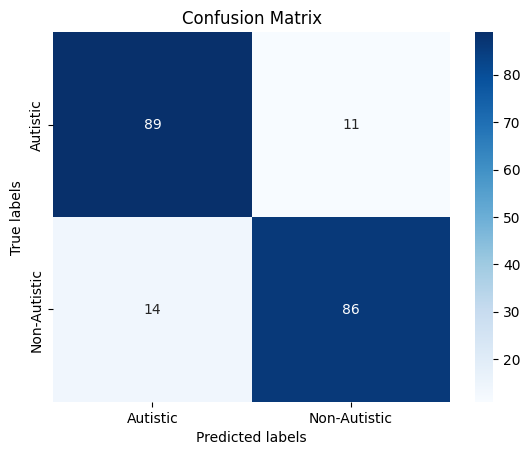

In [49]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the confusion matrix
confusion_matrix = np.array([[89, 11],
                             [14, 86]])

# Define the labels for the matrix
labels = ['Autistic', 'Non-Autistic']

# Create a heatmap
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Display the plot
plt.show()
